In [204]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [205]:
df=pd.read_excel("Final_Train.xlsx")

In [206]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [207]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [208]:
df["rating(%)"]=df["Rating"].str.split("%").str[0]

In [209]:
df["rating(%)"]=pd.to_numeric(df["rating(%)"], errors='coerce')

In [210]:
df["rating(%)"]=df["rating(%)"].fillna(df["rating(%)"].median())

In [211]:
df.drop("Rating",axis=1,inplace=True)

In [212]:
df["experience"]=df["Experience"].str[0:2]

In [213]:
df["Experience"]=pd.to_numeric(df["Experience"], errors='coerce')

In [214]:
df["degree1"]=df["Qualification"].str.split(",").str[0]
df["degree2"]=df["Qualification"].str.split(",").str[1]

In [215]:
df.replace(to_replace =np.NaN, 
                 value ="Missing",inplace=True) 

In [216]:
df.drop("degree2",axis=1,inplace=True)

In [217]:
df["experience"].value_counts()

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
58      1
59      1
61      1
60      1
Name: experience, Length: 64, dtype: int64

In [218]:
df.drop("Experience",axis=1,inplace=True)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Place               5961 non-null   object 
 2   Profile             5961 non-null   object 
 3   Miscellaneous_Info  5961 non-null   object 
 4   Fees                5961 non-null   int64  
 5   rating(%)           5961 non-null   float64
 6   experience          5961 non-null   object 
 7   degree1             5961 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 372.7+ KB


In [220]:
df["experience"]=df["experience"].astype("int64")

In [221]:
df["Place"] =df.Place.fillna(df["Place"].mode()[0])


In [222]:
df.Miscellaneous_Info.value_counts().sort_values(ascending=False)

Missing                                                                                 2620
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                        40
Tooth Extraction Dental Fillings Scaling / Polishing                                      12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                     12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment       9
                                                                                        ... 
97% 11 Feedback T Nagar, Chennai                                                           1
100% 3 Feedback Lajpat Nagar III, Delhi                                                    1
Health Checkup (General) Fever Treatment Balance Exercises                                 1
96% 1 Feedback Saibaba Colony, Coimbatore                                                  1
100% 8 Feedback Sanjay Nagar, Bangalore                               

For the column "Miscellaneous_Info" as there are around 2000 null values missing as replacing it with mode will make it imbalance as the heighest value is 40 ,so we can drop the column

In [223]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)

In [224]:
df["Qualification"].describe()

count     5961
unique    1420
top        BDS
freq       488
Name: Qualification, dtype: object

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


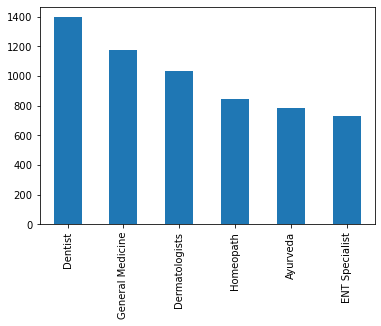

In [225]:
df["Profile"].value_counts().plot(kind = "bar")
print(df["Profile"].value_counts())
#as per this graph we can see the number of  doctor in different proffession max is Dentist and ENT Specialist is the min

In [226]:
df["Location"]=df["Place"].str.split(",").str[0]

df["City"]=df["Place"].str.split(",").str[1]
df["city2"]=df["Place"].str.split(",").str[2]

In [227]:
df["City"]=df["City"].fillna(df["City"].mode()[0])

In [228]:
df["City"]= df["City"].str.replace("Sector 5", "Delhi") 

In [229]:
df.drop(columns=["Place","city2"],axis=1,inplace=True)

In [230]:
df.isnull().sum()

Qualification    0
Profile          0
Fees             0
rating(%)        0
experience       0
degree1          0
Location         0
City             0
dtype: int64

Splitting the qualification to degree 1 and degree 2

In [231]:
df["degree1"]=df["Qualification"].str.split(",").str[0]
df["degree2"]=df["Qualification"].str.split(",").str[1]

Replacing the null values in degree 1 and degree2 with 0

In [232]:
df.replace(to_replace =np.NaN, 
                 value ="Missing",inplace=True) 

In [233]:
df["degree1"].value_counts()

MBBS                                        2448
BDS                                         1208
BAMS                                         711
BHMS                                         706
MD - Dermatology                              84
                                            ... 
MD - Ayurvedic Obstetrics and Gynecology       1
DNB - General Surgery                          1
PDCC - Pediatric Endocrinology                 1
MDS - Public Health Dentistry                  1
Diploma in Child Health (DCH)                  1
Name: degree1, Length: 151, dtype: int64

In [234]:
df["degree2"].value_counts()

Missing                                                             1962
 MS - ENT                                                            301
 MD - General Medicine                                               251
 MD - Dermatology                                                    244
 MBBS                                                                217
                                                                    ... 
 M.Sc - Counselling and Family Therapy                                 1
 Member of the Royal College of General Practitioners UK (MRCGP)       1
 Singapore                                                             1
 PGD Yoga                                                              1
 Fellowship Cochlear Implant Training                                  1
Name: degree2, Length: 427, dtype: int64

As in degree 2 there are almost 2000 missing values ,so we can drop this column as it wont be of much use

In [ ]:
df.drop("degree2",axis=1,inplace=True)

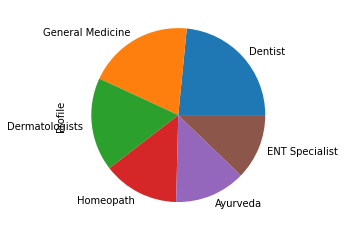

In [235]:
df['Profile'].value_counts().plot(kind='pie')

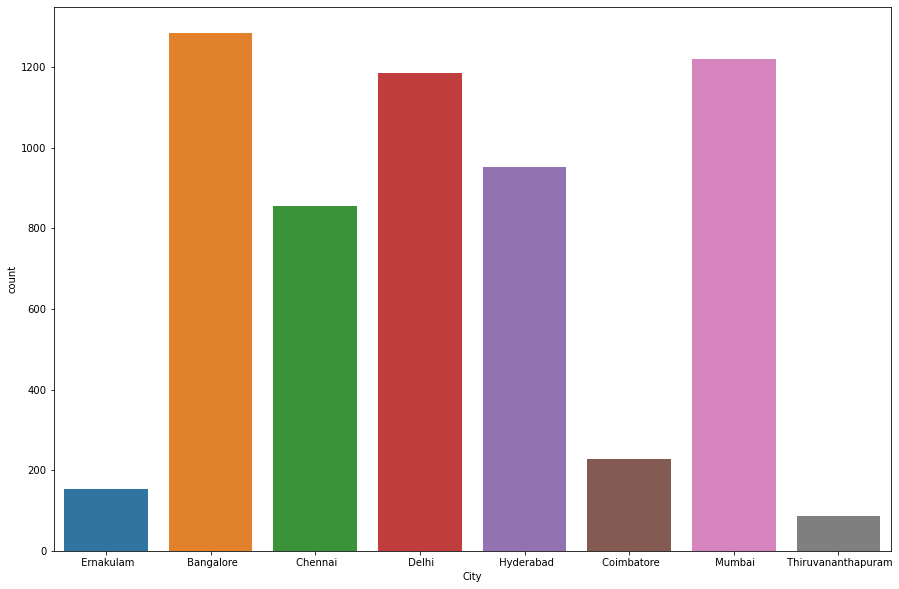

In [243]:
plt.figure(figsize=(15,10))
sns.countplot(df["City"])
plt.show()

Observation:The above can show that Bangalore has the highest count of doctor followed by Mumbai and Thiruvananthpuram

City
 Bangalore             324.364486
 Chennai               283.602339
 Coimbatore            154.298246
 Delhi                 362.911392
 Ernakulam             188.431373
 Hyderabad             307.507886
 Mumbai                308.292863
 Thiruvananthapuram    167.267442
Name: Fees, dtype: float64


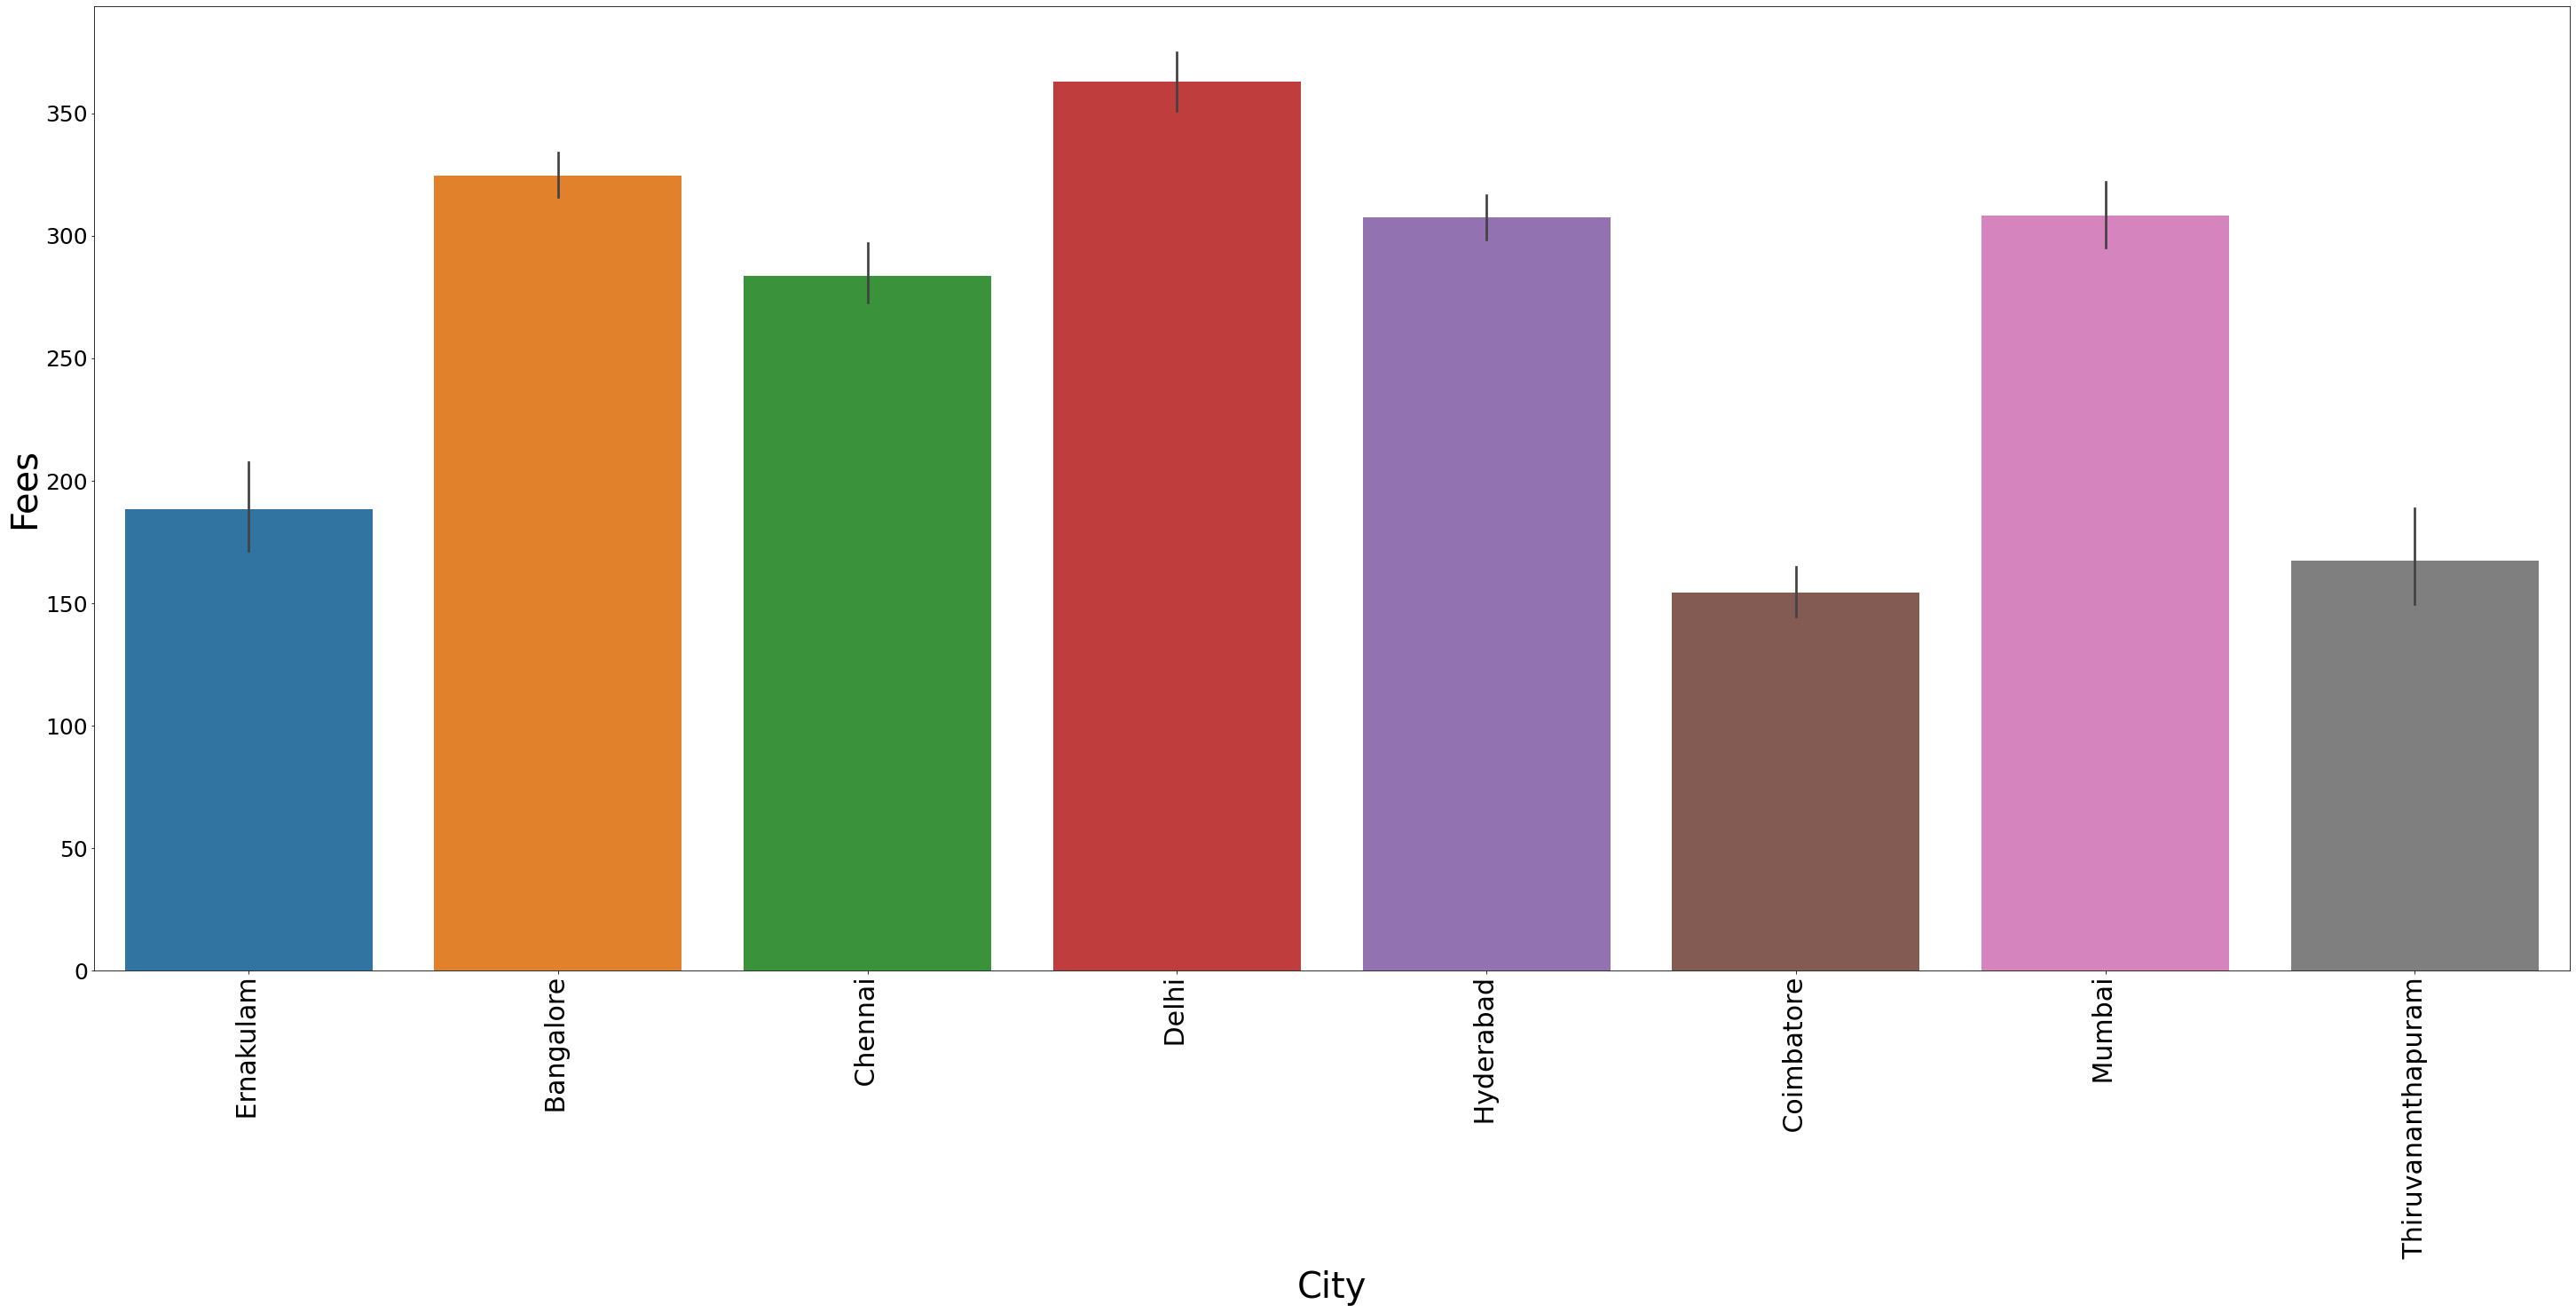

In [246]:
plt.figure(figsize=(50,20))
plt.xlabel("City", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="City",y="Fees",data=df)
print(df.groupby("City").Fees.mean())

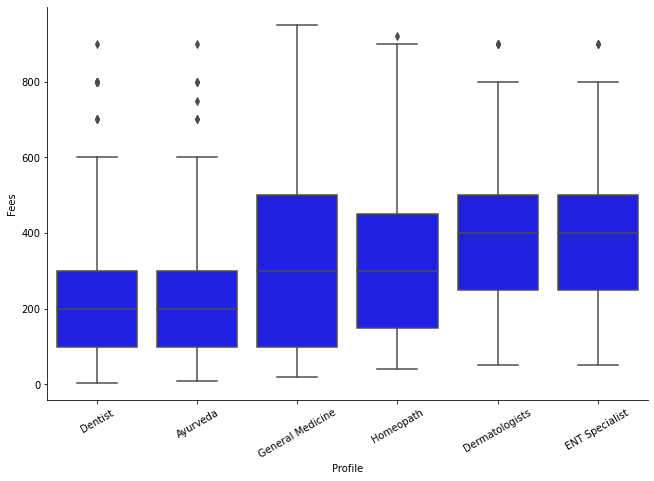

In [237]:
sns.catplot(x='Profile',y='Fees', data=df.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.xticks(rotation=30)
plt.show()

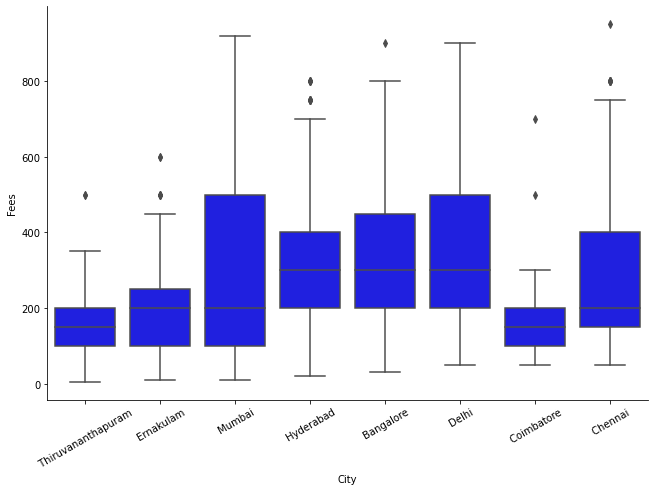

In [238]:
sns.catplot(x='City',y='Fees', data=df.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.xticks(rotation=30)
plt.show()

In [239]:
#Creating labels for better visaulization 
rating_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-99','100-109']
df['rating_group'] = pd.cut(df["rating(%)"], range(0, 111, 10), right=False, labels=rating_labels)


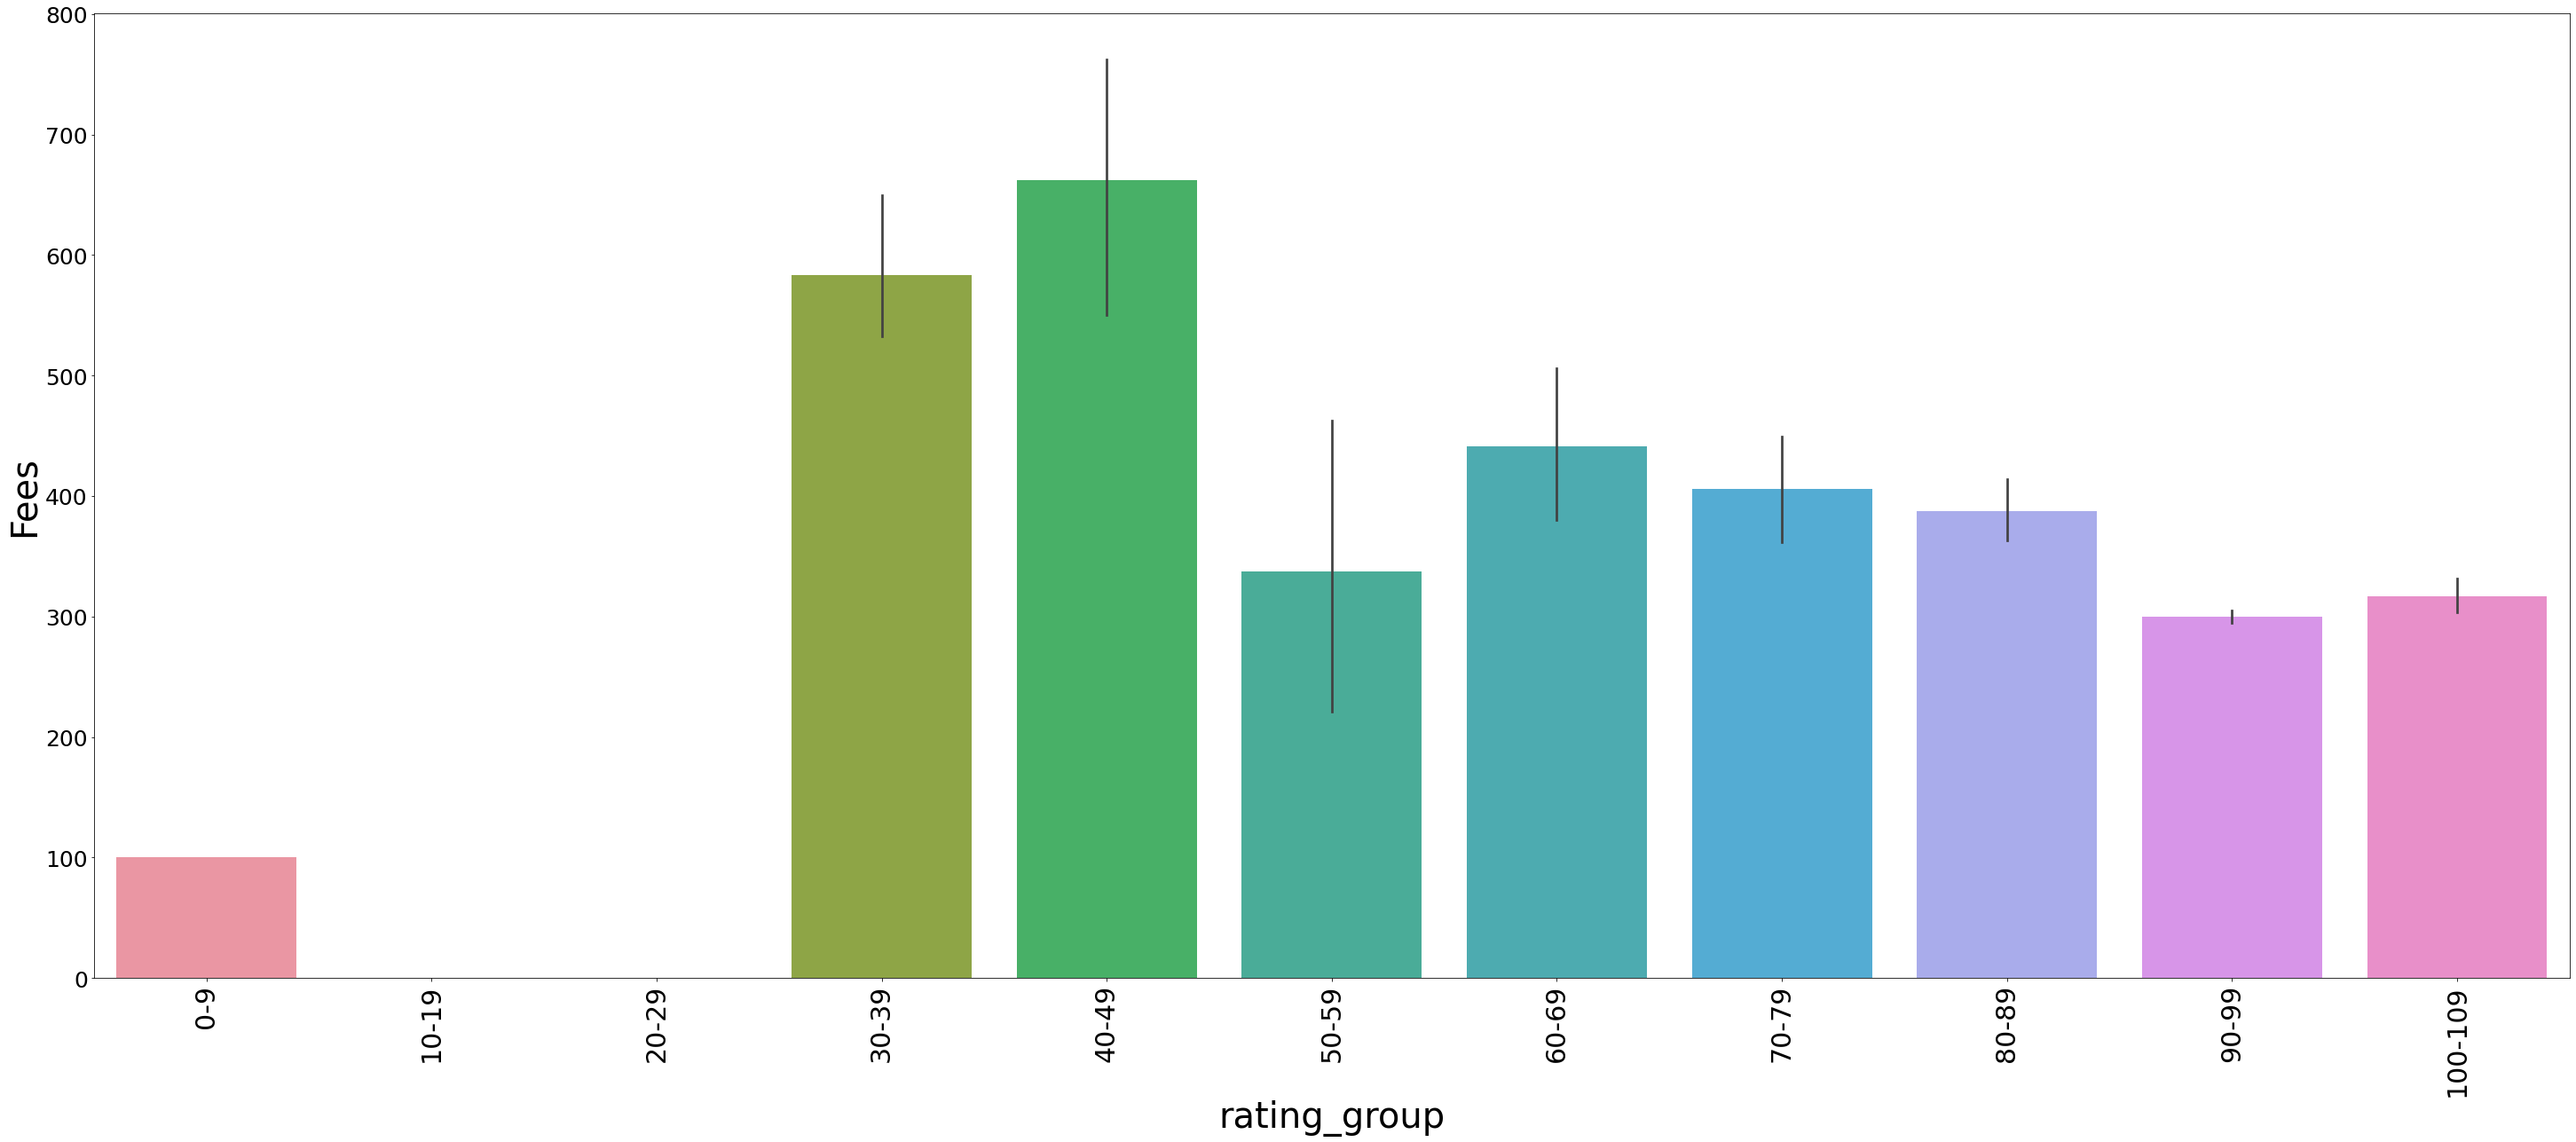

In [240]:
plt.figure(figsize=(50,20))
plt.xlabel("rating_group", fontsize=40)
plt.ylabel("Fees", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="rating_group",y="Fees",data=df)


Observation: Doctors with rating between 40-49 have more fees and least for 0-9

In [248]:
print(df["experience"].max(),"\n",df["experience"].min())
#creating bins on this basis

66 
 0


In [249]:
cols=['Profile','Location', 'City',"degree1"]
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in cols:
    df[i] = labelencoder.fit_transform(df[i])

In [250]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
new_df =df[(z < 3).all(axis=1)]
#removing outliers
print(new_df.shape,"\n",df.shape)


(5767, 7) 
 (5961, 7)


In [251]:
new_df.skew()

Profile       0.138511
Fees          0.725505
rating(%)    -2.756902
experience    0.918798
degree1       0.120764
Location      0.108681
City          0.000834
dtype: float64

Treating outliers

In [252]:
from sklearn.preprocessing import power_transform
df_skewed=power_transform(new_df,method="yeo-johnson")
df_new=pd.DataFrame(df_skewed,columns=new_df.columns)

In [253]:
df_new.skew()

Profile      -0.131378
Fees         -0.047428
rating(%)     0.050559
experience   -0.002841
degree1      -0.112074
Location     -0.268906
City         -0.217834
dtype: float64

In [254]:
corr_matrix=df_new.corr()
corr_matrix["Fees"].sort_values(ascending=False)

Fees          1.000000
degree1       0.236228
Profile       0.158104
experience    0.013197
Location     -0.054086
rating(%)    -0.060646
City         -0.068680
Name: Fees, dtype: float64

In [255]:
df_new.drop(columns=['rating(%)'],axis=1,inplace=True)

                                             Model Evalution

In [256]:
x_re=df_new.drop("Fees",axis=1)
y=df_new["Fees"]

In [257]:
#Scaling the columns 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_re)
x=sc.transform(x_re)
x=pd.DataFrame(x,columns=x_re.columns)

In [258]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [259]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state = 42,test_size=0.20)


In [260]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(X_train,Y_train)
    print("score of ",m, "is:",m.score(X_train,Y_train))
    predm=m.predict(X_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(Y_test,predm))
    print("Mean squared error:",mean_squared_error(Y_test,predm))
    print("r2 score :",r2_score(Y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.0666278886875209
ERROR:
 Mean absolute error: 0.7932395134143968
Mean squared error: 0.9288669855778463
r2 score : 0.07425138803254105


score of  DecisionTreeRegressor() is: 0.974308025559729
ERROR:
 Mean absolute error: 0.8681639117404464
Mean squared error: 1.4254065688441537
r2 score : -0.42062122250568823


score of  KNeighborsRegressor() is: 0.36837694178354785
ERROR:
 Mean absolute error: 0.79297216145665
Mean squared error: 1.0261875389893806
r2 score : -0.022742442769385196


score of  SVR() is: 0.1793647860620553
ERROR:
 Mean absolute error: 0.7595766435074446
Mean squared error: 0.9170282745417444
r2 score : 0.08605035438544384


score of  Lasso() is: 0.0
ERROR:
 Mean absolute error: 0.8417178505199325
Mean squared error: 1.003613880501158
r2 score : -0.00024456811459905303


score of  Ridge() is: 0.06662788602417069
ERROR:
 Mean absolute error: 0.7932414175733273
Mean squared error: 0.9288673832819629
r2 score : 0.07425099166358873


score

In [261]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsRegressor()
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(x,y)
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}
